<a href="https://colab.research.google.com/github/Sharon-Kairu/Emnist-Dataset-Assignment/blob/main/Emnist_Dataset_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EMINIST DATASET ASSIGNMENT

#This task for this assignment is to use the Emnist dataset to train the KNN and K-Fold Models using different amounts of data from the data set and to compare their accuracy


Imports

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Fetching the MNIST dataset from OpenML

In [2]:
mnist=fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#KNN 80% TRAINING


Spliting the dataset into training and test sets with 20% of the data for testing.


In [3]:
A,B = mnist
X_train, X_test, y_train, y_test = train_test_split(A ,B, test_size=0.2, random_state=11)

Training KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Calculating the accuracy score by comparing the predictions with the true labels y_test

In [5]:
prediction=knn.predict(X_test)
acc=accuracy_score(y_test, prediction)
print(acc)

0.9708571428571429


In [6]:
y_test

61700    0
7771     3
1856     8
5914     2
33661    0
        ..
14488    3
67799    9
23534    7
69059    3
25137    0
Name: class, Length: 14000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
prediction

array(['0', '3', '8', ..., '7', '3', '0'], dtype=object)

#*KNN*  50% Training

In [8]:
X_train, X_test, y_train, y_test = train_test_split(A ,B, test_size=0.5, random_state=11)

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
prediction=knn.predict(X_test)
acc=accuracy_score(y_test, prediction)
print(acc)

0.9648571428571429


In [11]:
y_test

61700    0
7771     3
1856     8
5914     2
33661    0
        ..
7390     5
30081    5
45657    7
36041    7
46825    6
Name: class, Length: 35000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
prediction

array(['0', '3', '8', ..., '7', '7', '6'], dtype=object)

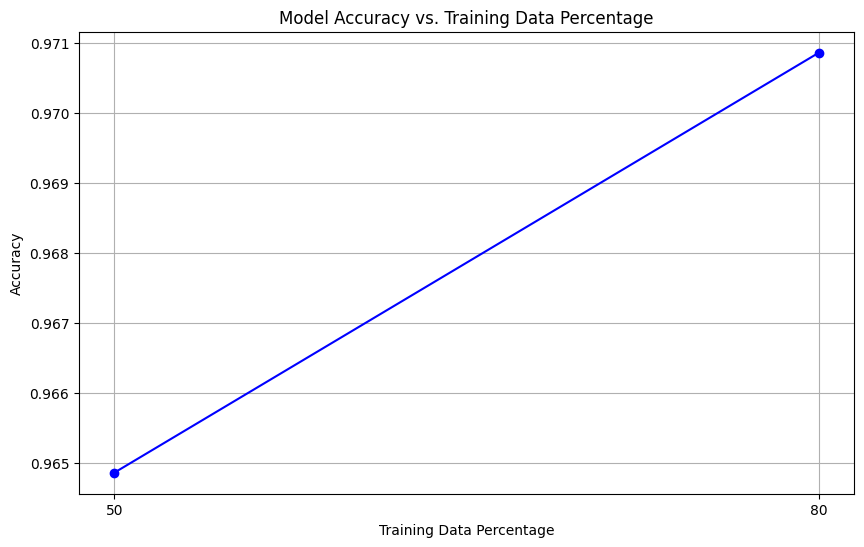

In [24]:
import matplotlib.pyplot as plt
training_percentages = [80, 50]
accuracies = [0.9708571428571429,0.9648571428571429]


plt.figure(figsize=(10, 6))
plt.plot(training_percentages, accuracies, marker='o', linestyle='-', color='b')


plt.title('Model Accuracy vs. Training Data Percentage')
plt.xlabel('Training Data Percentage')
plt.ylabel('Accuracy')
plt.xticks(training_percentages)
plt.grid(True)


plt.show()

#K-FOLD

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
kfold=KFold(n_splits=5,random_state=11,shuffle=True)

In [19]:
scores = cross_val_score(estimator=knn, X=A, y=B, cv=kfold)
scores

array([0.97085714, 0.9705    , 0.97064286, 0.97378571, 0.97221429])

In [23]:
print(f'Mean Accuracy: {scores.mean():.2%}')
print(f'Standard Deviation: {scores.std():.2%}')

Mean Accuracy: 97.16%
Standard Deviation: 0.13%
